In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv("C:\\Users\\hp\\Documents\\MGP\\Site_energy_predicton\\Dataset\\train_dataset.csv")
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [33]:
df["building_class"].value_counts()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [3]:
na_col=[]
missing_values=np.round(((df.isna().sum())/75757)*100,2)
for i in range(0,64):
    if(missing_values[i]!=0):
        na_col.append(df.columns[i])
        print(df.columns[i]," = ",missing_values[i],"%")

year_built  =  2.42 %
energy_star_rating  =  35.26 %
direction_max_wind_speed  =  54.23 %
direction_peak_wind_speed  =  55.19 %
max_wind_speed  =  54.23 %
days_with_fog  =  60.45 %


In [33]:
avg_temp=[["january_avg_temp","february_avg_temp","march_avg_temp","april_avg_temp","may_avg_temp","june_avg_temp","july_avg_temp","august_avg_temp","september_avg_temp","october_avg_temp","november_avg_temp","december_avg_temp"]]
#temp.append("avg_temp")
df_avg=df[["january_avg_temp","february_avg_temp","march_avg_temp","april_avg_temp","may_avg_temp","june_avg_temp","july_avg_temp","august_avg_temp","september_avg_temp","october_avg_temp","november_avg_temp","december_avg_temp","avg_temp"]]

In [40]:
df_avg["calc_avg"]=df_avg.iloc[1,:].mean()

<ipython-input-40-95ae5ae91f6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avg["calc_avg"]=df_avg.iloc[1,:].mean()


In [41]:
df_avg

,january_avg_temp,february_avg_temp,march_avg_temp,april_avg_temp,may_avg_temp,june_avg_temp,july_avg_temp,august_avg_temp,september_avg_temp,october_avg_temp,november_avg_temp,december_avg_temp,avg_temp,calc_avg
0,50.500000,50.589286,53.693548,55.500000,56.854839,60.500000,62.725806,62.161290,64.650000,63.016129,53.800000,49.274194,56.972603,56.941361
1,50.500000,50.589286,53.693548,55.500000,56.854839,60.500000,62.725806,62.161290,64.650000,63.016129,53.800000,49.274194,56.972603,56.941361
2,50.500000,50.589286,53.693548,55.500000,56.854839,60.500000,62.725806,62.161290,64.650000,63.016129,53.800000,49.274194,56.972603,56.941361
3,50.500000,50.589286,53.693548,55.500000,56.854839,60.500000,62.725806,62.161290,64.650000,63.016129,53.800000,49.274194,56.972603,56.941361
4,50.500000,50.589286,53.693548,55.500000,56.854839,60.500000,62.725806,62.161290,64.650000,63.016129,53.800000,49.274194,56.972603,56.941361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,43.451613,47.672414,49.354839,56.266667,59.193548,63.566667,66.951613,68.612903,61.383333,55.403226,51.283333,38.532258,55.147541,56.941361
75753,43.451613,47.672414,49.354839,56.266667,59.193548,63.566667,66.951613,68.612903,61.383333,55.403226,51.283333,38.532258,55.147541,56.941361
75754,36.612903,41.637931,41.338710,50.183333,52.145161,56.233333,58.758065,61.612903,53.783333,47.661290,44.650000,30.338710,47.911202,56.941361
75755,36.612903,41.637931,41.338710,50.183333,52.145161,56.233333,58.758065,61.612903,53.783333,47.661290,44.650000,30.338710,47.911202,56.941361


In [13]:
df["Year_Factor"].value_counts()

6    22449
5    18308
4    12946
3    10879
2     9058
1     2117
Name: Year_Factor, dtype: int64

In [6]:
#plt.figure(figsize=(20,20))
#sns.heatmap(df.corr(),annot=False,cmap=plt.cm.CMRmap_r)

In [7]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif_data=[variance_inflation_factor(df.iloc[:,:-1].values,i) for i in range(len(df.columns)-1)]

In [13]:
df["year_built"]=df["year_built"].replace(0,1600)

In [14]:
df["year_built"].min()

1600.0

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year_Factor', ylabel='year_built'>

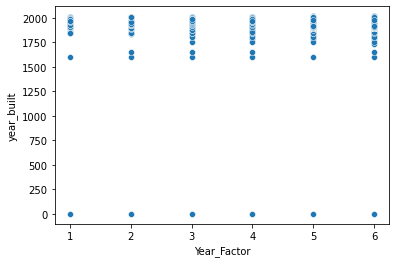

In [12]:
sns.scatterplot(df["Year_Factor"],df["year_built"])

In [7]:
df["facility_type"].value_counts()

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

<AxesSubplot:xlabel='site_eui', ylabel='facility_type'>

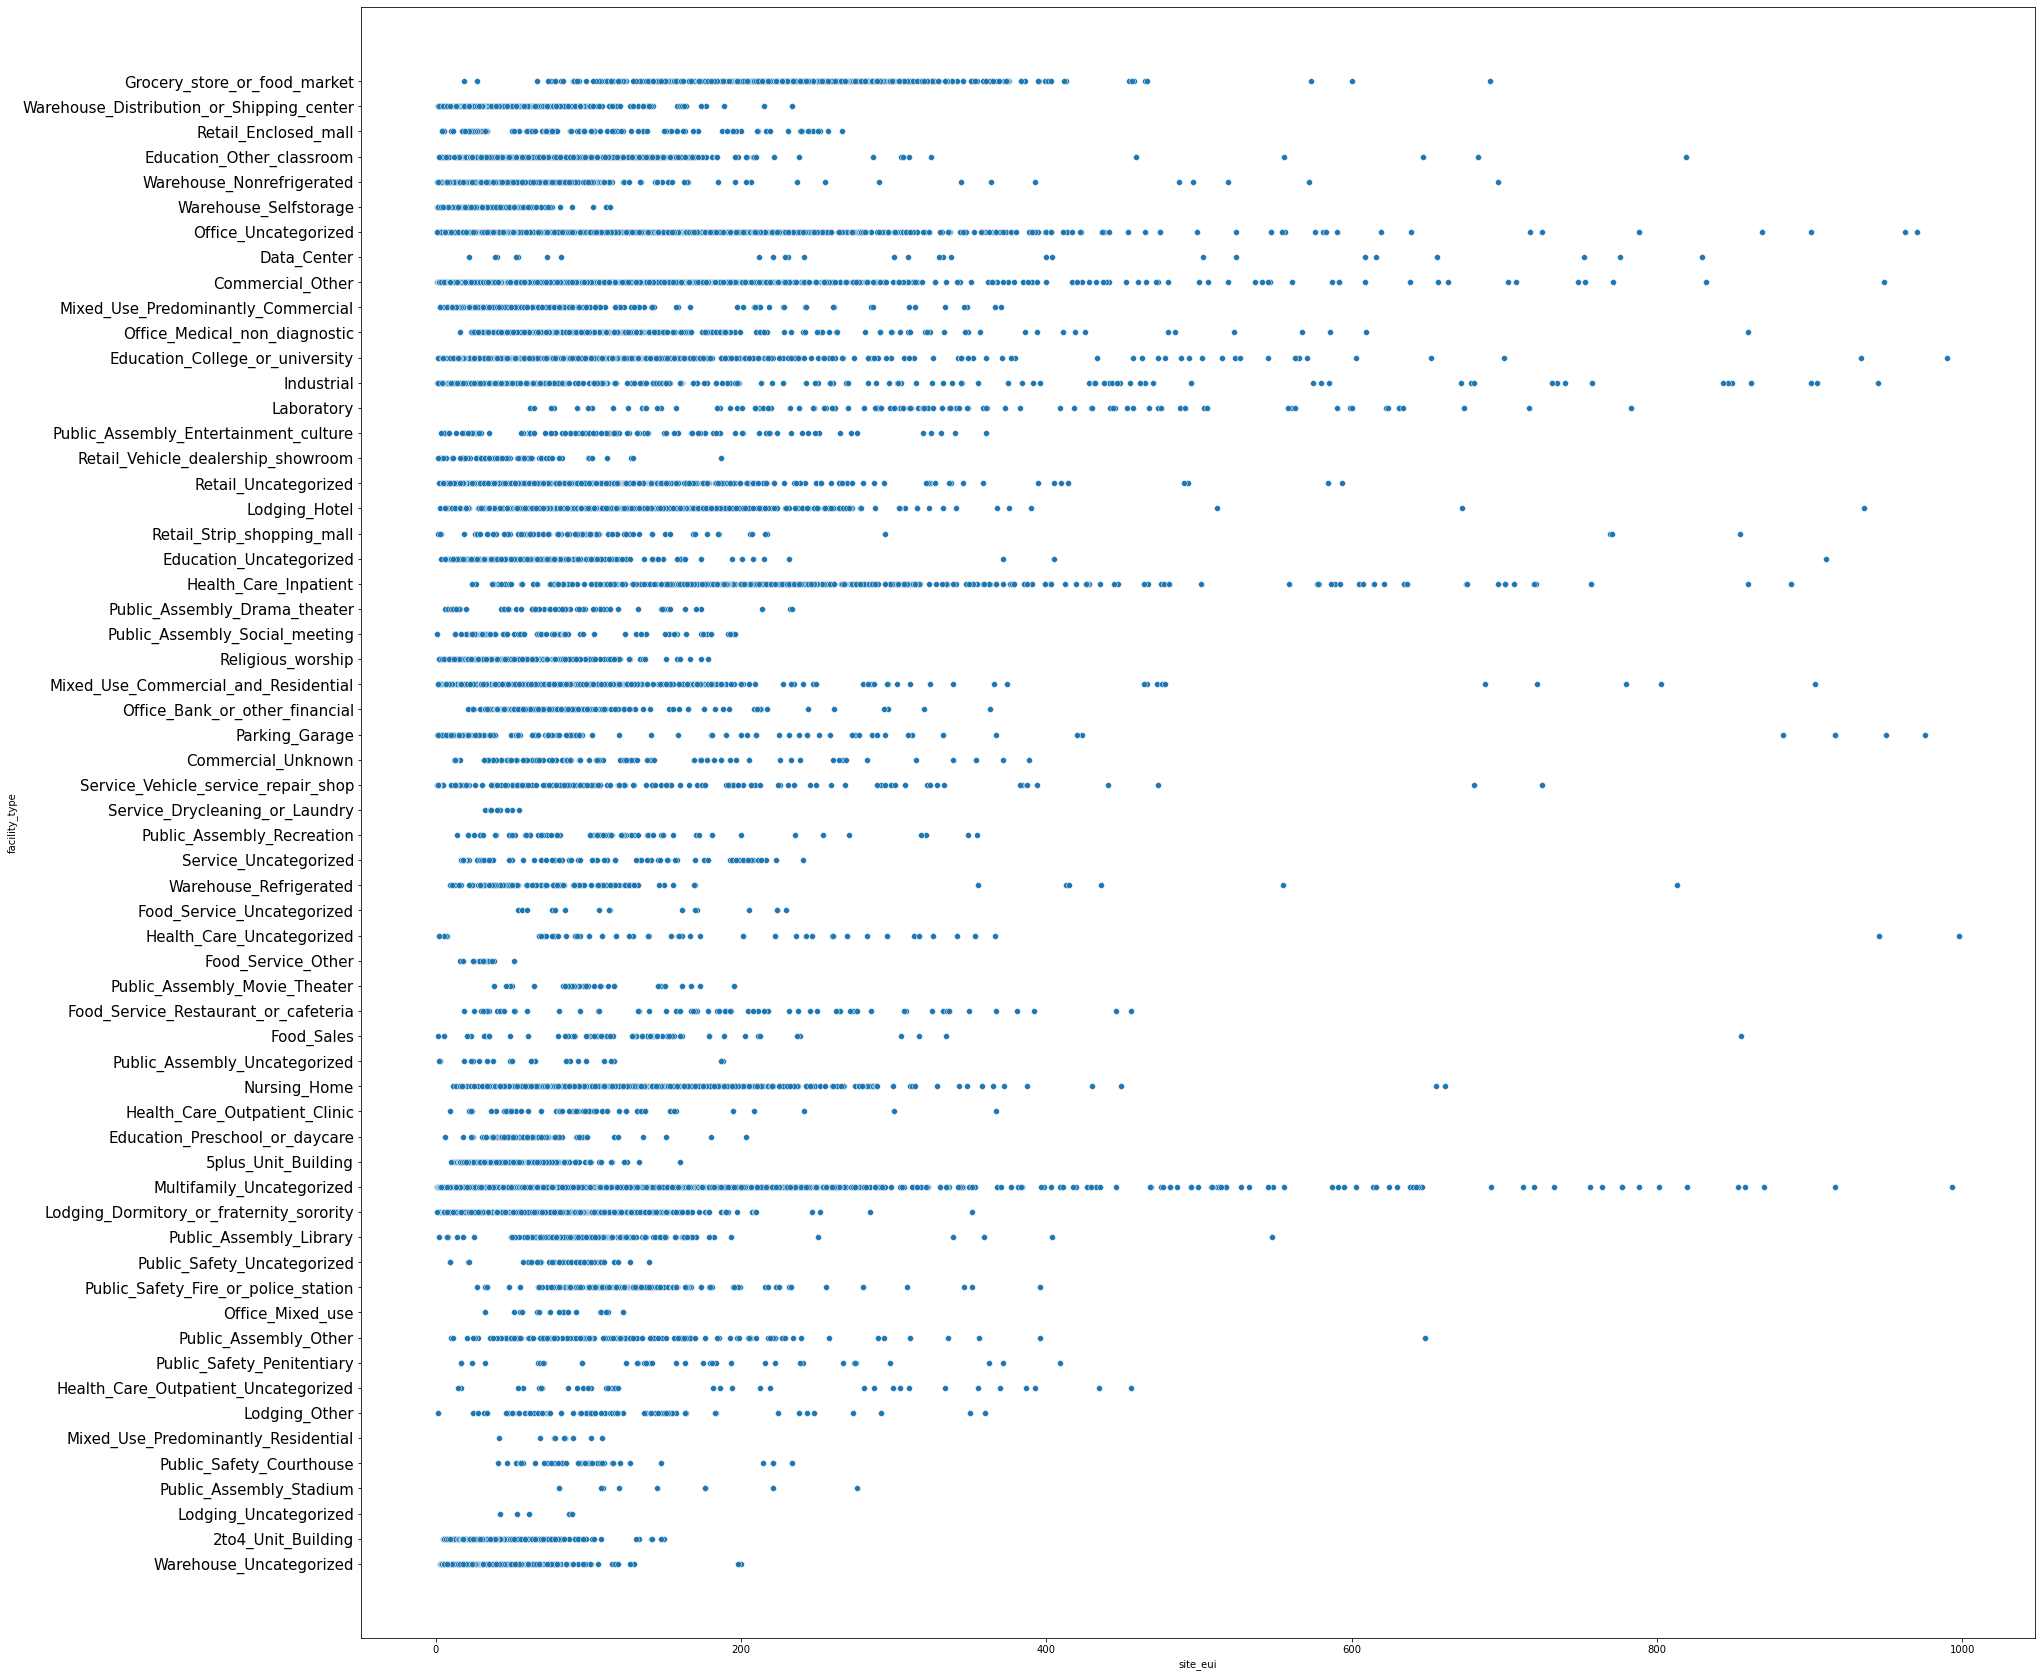

In [11]:
plt.figure(figsize=(30,30))
plt.yticks(fontsize=15)
sns.scatterplot(data=df,x="site_eui",y="facility_type")

<AxesSubplot:xlabel='site_eui', ylabel='State_Factor'>

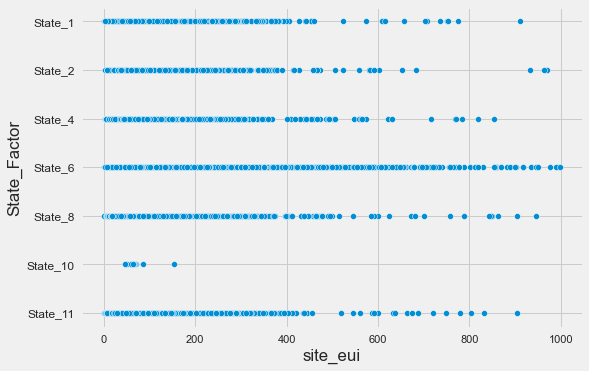

In [31]:

plt.yticks(fontsize=12)
sns.scatterplot(data=df,x="site_eui",y="State_Factor")

<AxesSubplot:xlabel='site_eui', ylabel='Year_Factor'>

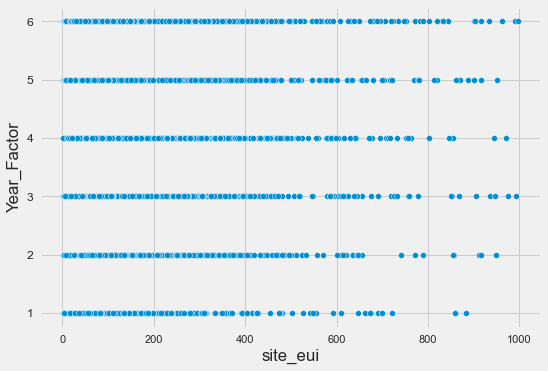

In [33]:
plt.yticks(fontsize=12)
sns.scatterplot(data=df,x="site_eui",y="Year_Factor")

<AxesSubplot:xlabel='snowfall_inches', ylabel='site_eui'>

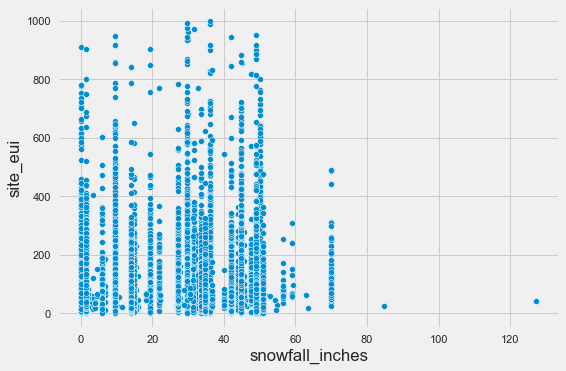

In [41]:
sns.scatterplot(data=df,x="snowfall_inches",y="site_eui")

<AxesSubplot:xlabel='energy_star_rating', ylabel='site_eui'>

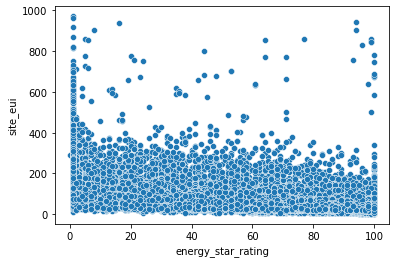

In [19]:
sns.scatterplot(x=df["energy_star_rating"],y=df["site_eui"])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='energy_star_rating', ylabel='count'>

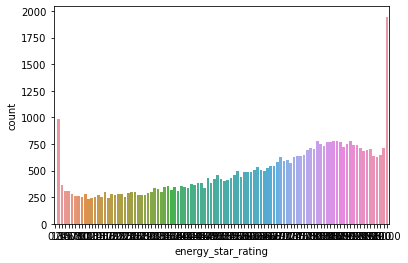

In [22]:

sns.countplot(df["energy_star_rating"])

<AxesSubplot:xlabel='site_eui', ylabel='Density'>

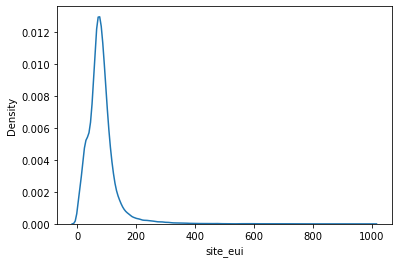

In [23]:
sns.kdeplot(df["site_eui"])

In [15]:
df["State_Factor"]=df["State_Factor"].str[-1].astype(int)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State_Factor', ylabel='avg_temp'>

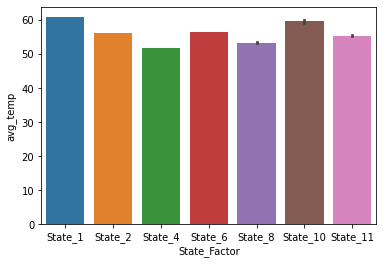

In [48]:
sns.barplot(df["State_Factor"],df["avg_temp"])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State_Factor', ylabel='count'>

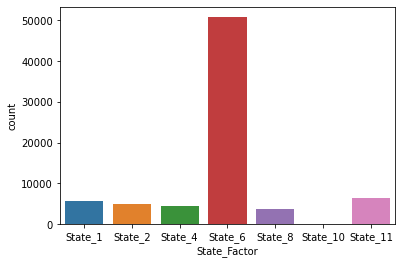

In [45]:
sns.countplot(df["State_Factor"])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

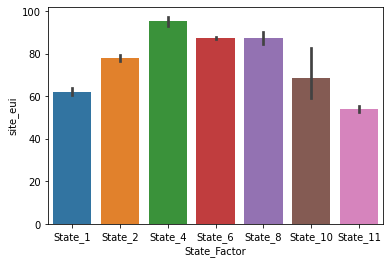

In [47]:
sns.barplot(df["State_Factor"],df["site_eui"])

In [16]:
from sklearn.preprocessing import OrdinalEncoder
ordinal=OrdinalEncoder()
cat_col=["building_class","facility_type"]
df[cat_col]=ordinal.fit_transform(df[cat_col])

In [33]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,1,0.0,13.0,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,1,0.0,55.0,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,1,0.0,48.0,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,1,0.0,6.0,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,1,0.0,56.0,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [17]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=7)
df[na_col]=imputer.fit_transform(df[na_col])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  int32  
 2   building_class             75757 non-null  float64
 3   facility_type              75757 non-null  float64
 4   floor_area                 75757 non-null  float64
 5   year_built                 75757 non-null  float64
 6   energy_star_rating         75757 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [21]:
df.to_csv(r"C:\Users\hp\Documents\MGP\Site_energy_predicton\\Dataset\\imputed_data.csv")

In [22]:
X=df.drop(["site_eui","id"],axis=1)
Y=df["site_eui"]

In [28]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=10)

In [29]:
print(train_X.shape)
print(train_y.shape)

(60605, 62)
(60605,)


In [25]:
from sklearn.metrics import mean_squared_error
def score(model):
    model.fit(train_X,train_y)
    pred=model.predict(test_X)
    print(mean_squared_error(test_y,pred))

In [30]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators=1000,max_depth=12)
score(clf)

1995.52300928729
